In [35]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import datetime as dt
from scipy.stats import linregress
from sqlalchemy import create_engine
from sqlalchemy import inspect

In [2]:
earthquake_path = "Resources/earthquakes.csv"
earthquake_data = pd.read_csv(earthquake_path)
earthquake_data


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-10-01T23:50:15.010Z,19.428167,-155.618333,-0.740,2.99,ml,44.0,78.0,NaN,0.19,...,2022-10-04T03:25:54.350Z,"26 km E of Honaunau-Napoopoo, Hawaii",earthquake,0.21,0.330,0.169825,39.0,reviewed,hv,hv
1,2022-10-01T23:41:28.811Z,-15.041100,-172.130300,5.000,4.90,mb,45.0,111.0,1.175,0.75,...,2022-10-02T00:17:19.040Z,"121 km SSW of Lotofag?, Samoa",earthquake,6.90,1.858,0.092000,37.0,reviewed,us,us
2,2022-10-01T22:39:31.682Z,-57.944400,-25.558300,45.111,4.60,mb,31.0,87.0,7.125,1.12,...,2022-10-01T22:57:43.040Z,NaN,earthquake,11.67,8.845,0.102000,29.0,reviewed,us,us
3,2022-10-01T22:37:55.362Z,58.339300,-133.288500,0.000,2.90,ml,NaN,NaN,NaN,0.60,...,2022-10-01T22:47:45.040Z,"66 km E of Juneau, Alaska",earthquake,NaN,0.400,NaN,NaN,automatic,ak,ak
4,2022-10-01T21:24:17.856Z,-5.336300,133.760000,34.588,4.40,mb,23.0,84.0,2.835,0.69,...,2022-10-01T21:47:45.040Z,"Kepulauan Kai, Indonesia",earthquake,5.68,6.440,0.155000,12.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17458,2022-02-01T00:52:43.137Z,-31.336100,-68.612700,111.400,4.60,mb,NaN,30.0,0.217,0.86,...,2022-04-15T17:57:09.040Z,"13 km NW of Albardón, Argentina",earthquake,6.10,4.400,0.043000,163.0,reviewed,us,us
17459,2022-02-01T00:36:25.621Z,52.030100,177.129000,10.000,3.50,ml,NaN,177.0,0.858,0.60,...,2022-04-15T17:57:29.040Z,"283 km ESE of Attu Station, Alaska",earthquake,4.90,1.900,0.097000,14.0,reviewed,us,us
17460,2022-02-01T00:26:27.912Z,51.985500,177.356100,10.000,3.30,ml,NaN,176.0,0.715,0.92,...,2022-04-15T17:57:24.040Z,"299 km ESE of Attu Station, Alaska",earthquake,3.70,2.000,0.097000,14.0,reviewed,us,us
17461,2022-02-01T00:18:53.742Z,-7.588000,127.496800,190.110,4.60,mb,NaN,50.0,3.787,0.72,...,2022-04-15T17:57:09.040Z,"116 km NNE of Lospalos, Timor Leste",earthquake,6.90,5.100,0.071000,61.0,reviewed,us,us


In [3]:
earthquake_data_dropped = earthquake_data.drop(earthquake_data.columns[[5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21]],axis=1)

In [4]:
earthquake_data_dropped

,time,latitude,longitude,depth,mag,place
0,2022-10-01T23:50:15.010Z,19.428167,-155.618333,-0.740,2.99,"26 km E of Honaunau-Napoopoo, Hawaii"
1,2022-10-01T23:41:28.811Z,-15.041100,-172.130300,5.000,4.90,"121 km SSW of Lotofag?, Samoa"
2,2022-10-01T22:39:31.682Z,-57.944400,-25.558300,45.111,4.60,NaN
3,2022-10-01T22:37:55.362Z,58.339300,-133.288500,0.000,2.90,"66 km E of Juneau, Alaska"
4,2022-10-01T21:24:17.856Z,-5.336300,133.760000,34.588,4.40,"Kepulauan Kai, Indonesia"
...,...,...,...,...,...,...
17458,2022-02-01T00:52:43.137Z,-31.336100,-68.612700,111.400,4.60,"13 km NW of Albardón, Argentina"
17459,2022-02-01T00:36:25.621Z,52.030100,177.129000,10.000,3.50,"283 km ESE of Attu Station, Alaska"
17460,2022-02-01T00:26:27.912Z,51.985500,177.356100,10.000,3.30,"299 km ESE of Attu Station, Alaska"
17461,2022-02-01T00:18:53.742Z,-7.588000,127.496800,190.110,4.60,"116 km NNE of Lospalos, Timor Leste"


In [5]:
earthquake_data_renamed = earthquake_data_dropped.rename(columns={"time":"Time", "latitude":"Latitude", "longitude":"Longitude", "depth":"Depth(km)", "mag":"Magnitude", "place": "Location"})

In [6]:
earthquake_data_renamed

,Time,Latitude,Longitude,Depth(km),Magnitude,Location
0,2022-10-01T23:50:15.010Z,19.428167,-155.618333,-0.740,2.99,"26 km E of Honaunau-Napoopoo, Hawaii"
1,2022-10-01T23:41:28.811Z,-15.041100,-172.130300,5.000,4.90,"121 km SSW of Lotofag?, Samoa"
2,2022-10-01T22:39:31.682Z,-57.944400,-25.558300,45.111,4.60,NaN
3,2022-10-01T22:37:55.362Z,58.339300,-133.288500,0.000,2.90,"66 km E of Juneau, Alaska"
4,2022-10-01T21:24:17.856Z,-5.336300,133.760000,34.588,4.40,"Kepulauan Kai, Indonesia"
...,...,...,...,...,...,...
17458,2022-02-01T00:52:43.137Z,-31.336100,-68.612700,111.400,4.60,"13 km NW of Albardón, Argentina"
17459,2022-02-01T00:36:25.621Z,52.030100,177.129000,10.000,3.50,"283 km ESE of Attu Station, Alaska"
17460,2022-02-01T00:26:27.912Z,51.985500,177.356100,10.000,3.30,"299 km ESE of Attu Station, Alaska"
17461,2022-02-01T00:18:53.742Z,-7.588000,127.496800,190.110,4.60,"116 km NNE of Lospalos, Timor Leste"


In [10]:
earthquake_round = earthquake_data_renamed.round(2)
earthquake_clean = earthquake_round.dropna()
earthquake_clean

,Time,Latitude,Longitude,Depth(km),Magnitude,Location
0,2022-10-01T23:50:15.010Z,19.43,-155.62,-0.74,2.99,"26 km E of Honaunau-Napoopoo, Hawaii"
1,2022-10-01T23:41:28.811Z,-15.04,-172.13,5.00,4.90,"121 km SSW of Lotofag?, Samoa"
3,2022-10-01T22:37:55.362Z,58.34,-133.29,0.00,2.90,"66 km E of Juneau, Alaska"
4,2022-10-01T21:24:17.856Z,-5.34,133.76,34.59,4.40,"Kepulauan Kai, Indonesia"
6,2022-10-01T19:41:35.962Z,-6.73,129.93,127.21,4.60,Banda Sea
...,...,...,...,...,...,...
17458,2022-02-01T00:52:43.137Z,-31.34,-68.61,111.40,4.60,"13 km NW of Albardón, Argentina"
17459,2022-02-01T00:36:25.621Z,52.03,177.13,10.00,3.50,"283 km ESE of Attu Station, Alaska"
17460,2022-02-01T00:26:27.912Z,51.99,177.36,10.00,3.30,"299 km ESE of Attu Station, Alaska"
17461,2022-02-01T00:18:53.742Z,-7.59,127.50,190.11,4.60,"116 km NNE of Lospalos, Timor Leste"


The P-value is: 7.363965464520863e-93
The r-squared is: 0.02
The correlation coefficient is : 0.156


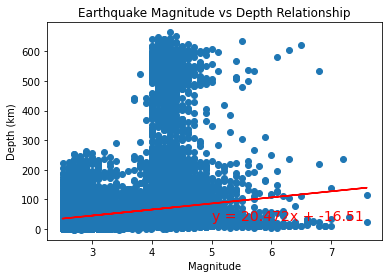

In [29]:
magnitude = earthquake_clean["Magnitude"]
depth = earthquake_clean["Depth(km)"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(magnitude, depth)
regress_values = magnitude * slope + intercept
line_eq = (f'y = {round(slope,3)}x + {round(intercept,2)}')
plt.scatter(magnitude, depth)
plt.plot(magnitude, regress_values,"red")
plt.annotate(line_eq,(5,30), color="red",fontsize=14)
plt.title("Earthquake Magnitude vs Depth Relationship")
plt.xlabel("Magnitude")
plt.ylabel("Depth (km)")
print(f"The P-value is: {(pvalue)}")
print(f"The r-squared is: {round(rvalue**2,2)}")
print(f'The correlation coefficient is : {round(rvalue,3)}')

In [36]:
earthquake_clean["Time"] = pd.to_datetime(earthquake_clean['Time'])

In [39]:
earthquake_clean.dtypes

Time         datetime64[ns, UTC]
Latitude                 float64
Longitude                float64
Depth(km)                float64
Magnitude                float64
Location                  object
dtype: object

In [71]:
month  = pd.DatetimeIndex(earthquake_clean['Time']).month.unique()
total = earthquake_clean.groupby(earthquake_clean.Time.dt.month)['Magnitude'].nunique()

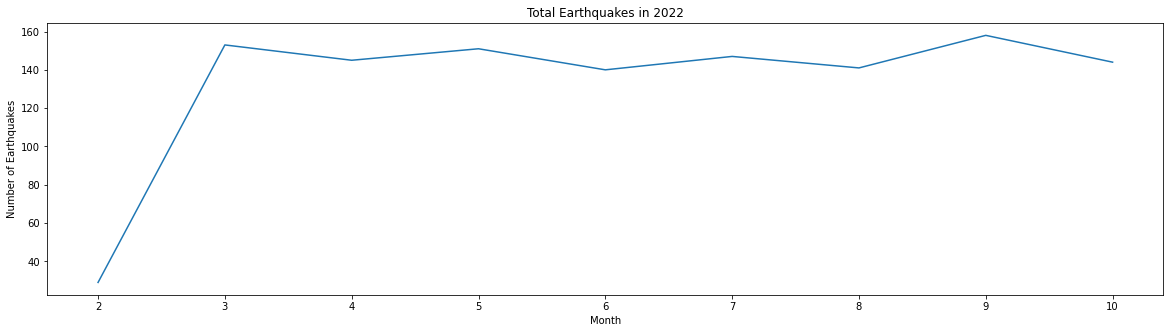

In [74]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)
plt.title("Total Earthquakes in 2022")
plt.xlabel("Month")
plt.ylabel("Number of Earthquakes")
ax.plot(month, total)
plt.show()